# Домашняя работа №2. Графический анализ данных

Цель работы: изучить выбранные датасеты с помощью графиков

## Задание №1

Цель: Оценить качественное содержание датасета

### Работа с набором данных для задачи линейной регрессии (целевая переменная - непрерывное числовое значение)

* Постройте график распределения данных.
* Постройте ящик с усами для числовых признаков. Зафиксируйте признаки с выбросами.
* Для текстовых признаков постройте диаграммы количественного распределения. Зафиксируйте признаки с существенным дисбалансом значений.
* Для зафиксированных признаков проведите дополнительный анализ данных: постройте графики количества значений.
* Сохраните каждый график как картинку.
  

## Решение задания №1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bike/train.csv')

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday

###График распределения целевой переменной

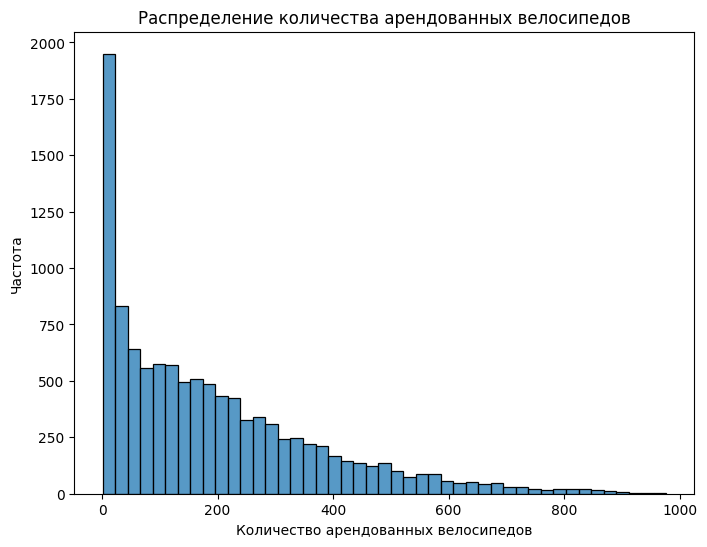

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="count")
plt.title('Распределение количества арендованных велосипедов')
plt.xlabel('Количество арендованных велосипедов')
plt.ylabel('Частота')
plt.savefig('target_distribution_updated.png', dpi=100)

###График распределения данных

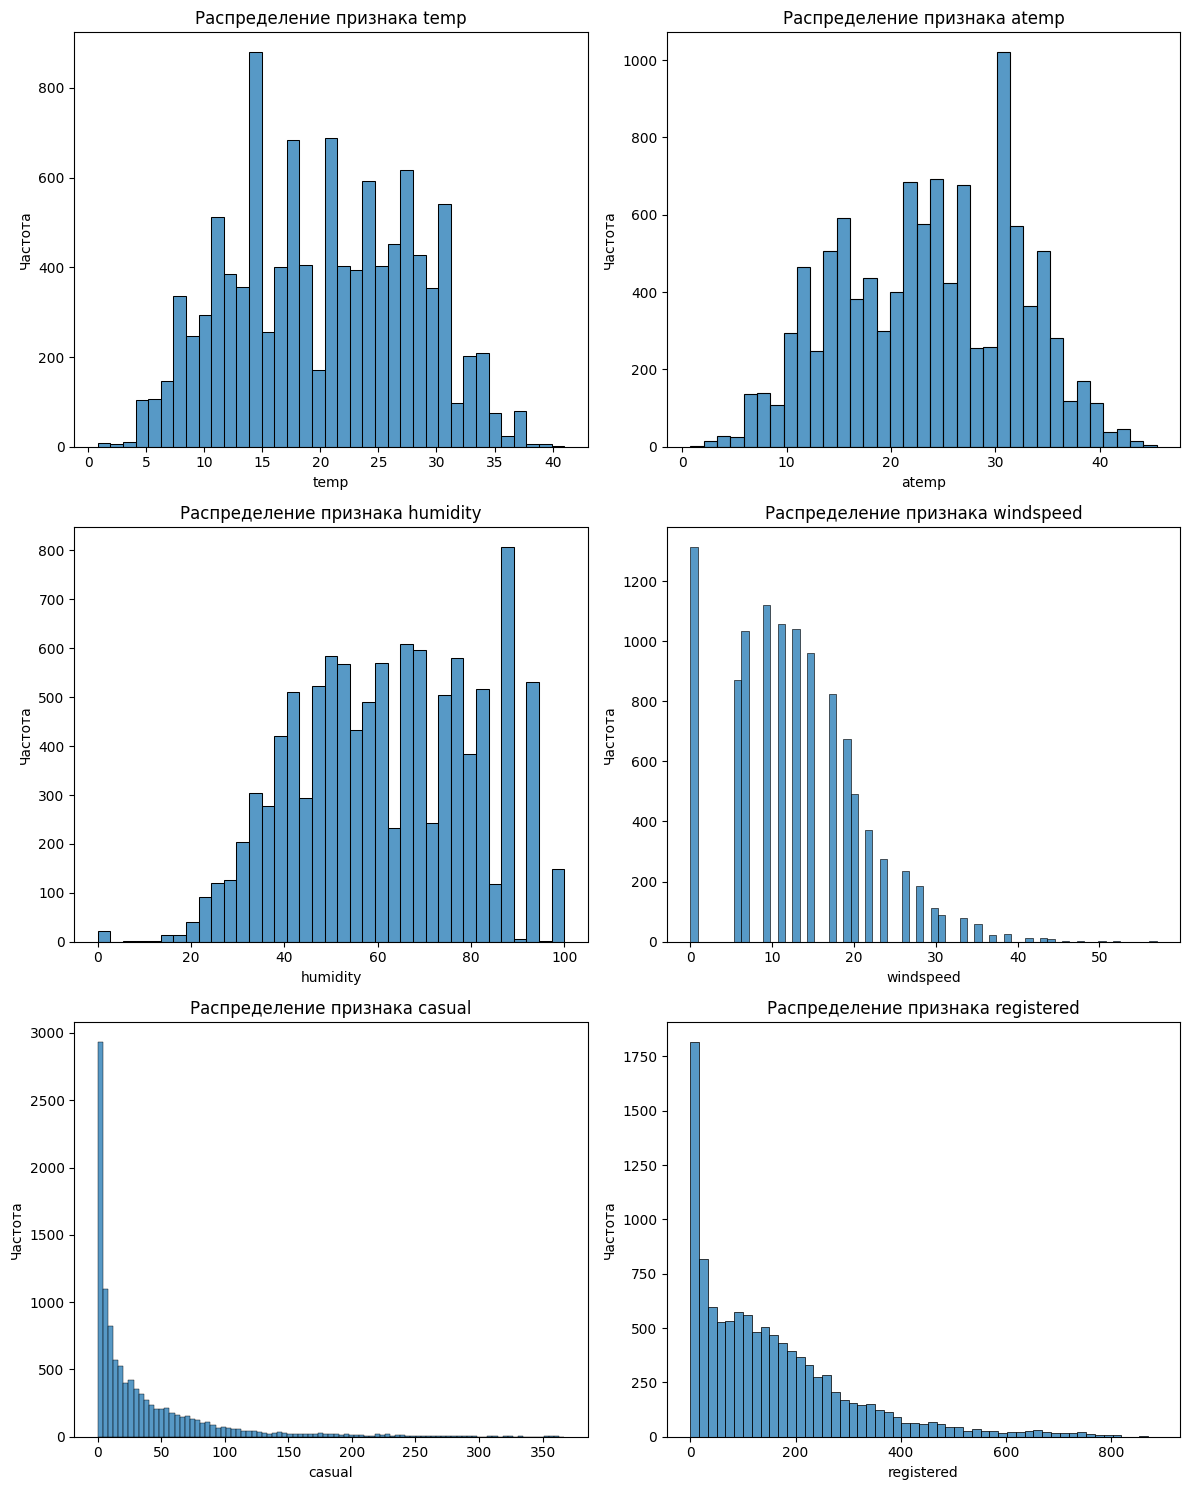

In [ ]:
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.histplot(data=df, x=feature, ax=ax)
    ax.set_title(f'Распределение признака {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.savefig('distributions_numerical_features.png', dpi=100)

###Ящик с усами для текстовых переменных

####Ящик с усами 'temp', 'atemp', 'humidity', 'windspeed'

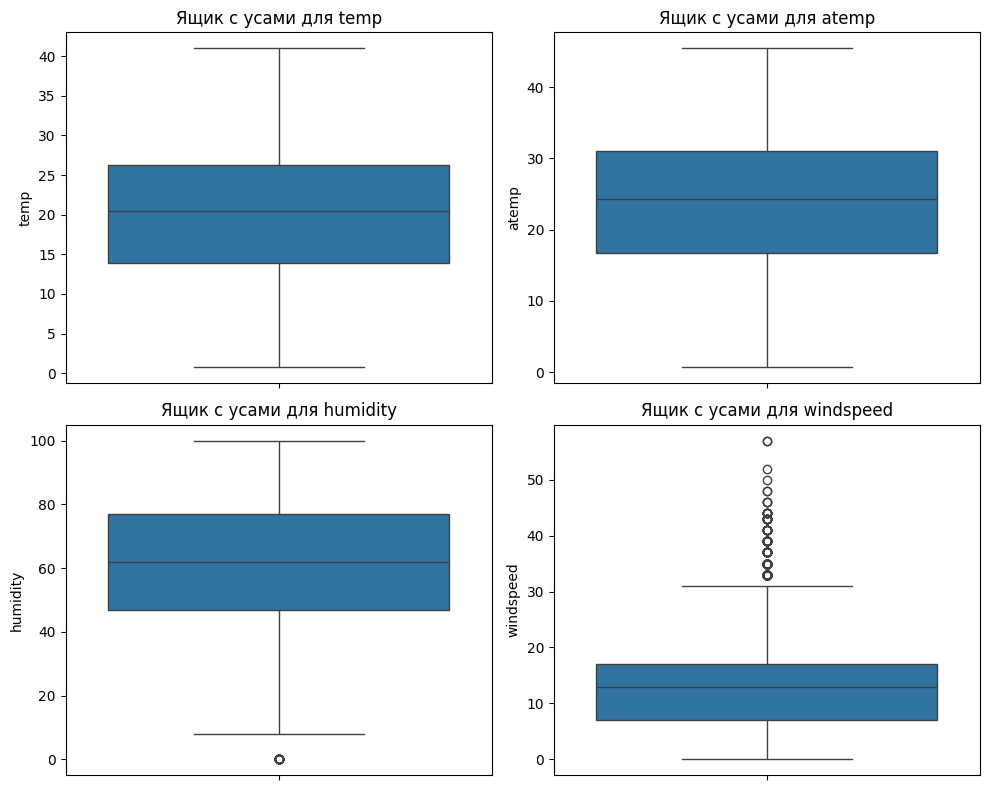

In [ ]:
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.boxplot(y=feature, data=df, ax=ax)
    ax.set_title(f'Ящик с усами для {feature}')

plt.tight_layout()
plt.savefig('boxplots_numerical_features.png', dpi=100)

####Ящик с усами 'casual', 'registered'

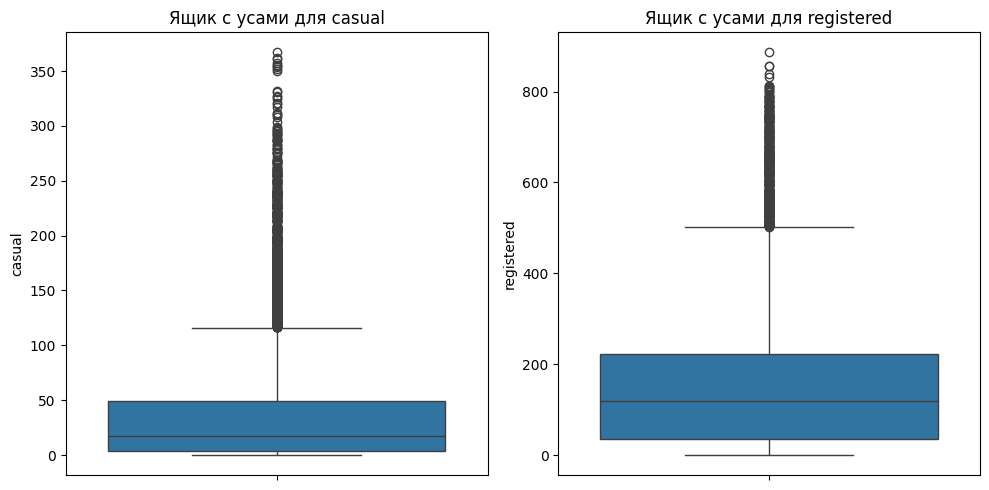

In [ ]:
numerical_features = ['casual', 'registered']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(y=feature, data=df, ax=ax)
    ax.set_title(f'Ящик с усами для {feature}')

plt.tight_layout()
plt.savefig('boxplots_casual_registered.png', dpi=100)

###Диаграмма количественного распределения для категориальных признаков

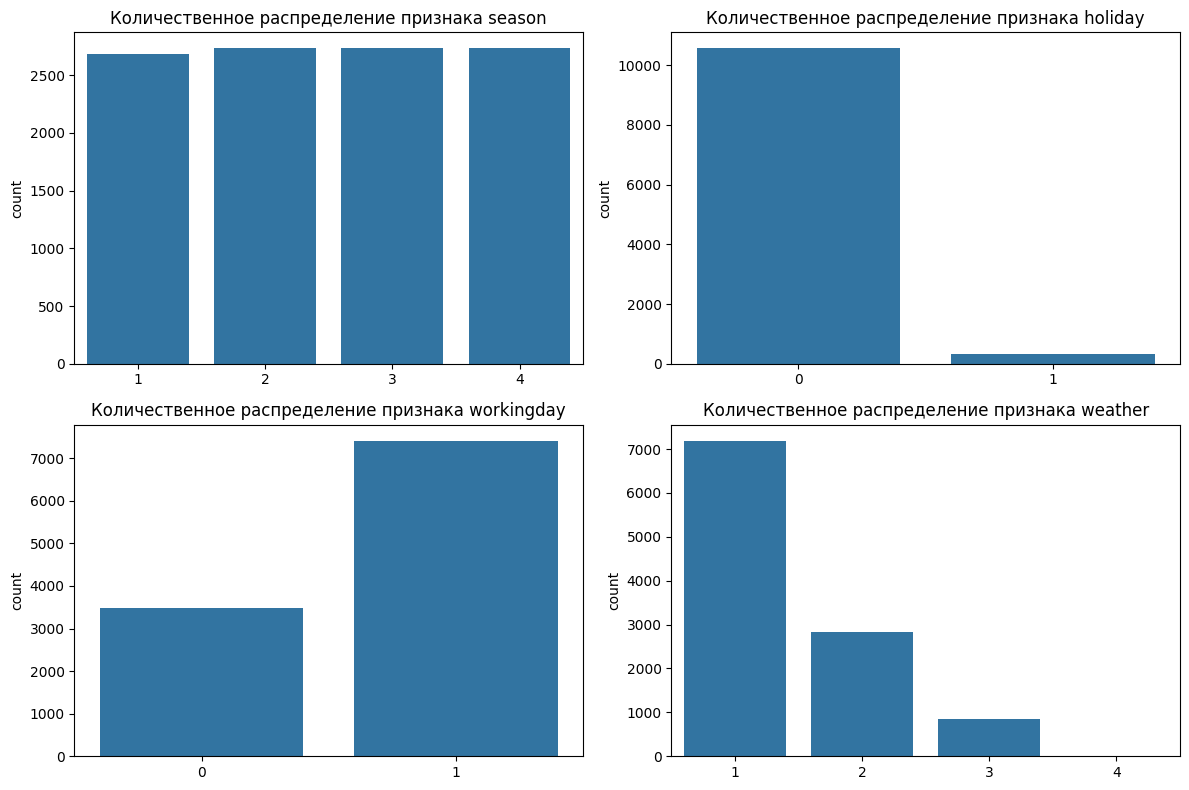

In [ ]:
categorical_features = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.countplot(x=feature, data=df, ax=ax)
    ax.set_title(f'Количественное распределение признака {feature}')
    ax.set_xlabel('')

plt.tight_layout()
plt.savefig('countplots_categorical_features.png', dpi=100)

###Дополнительный анализ данных

Признаки с выбросами

Выбросы можно определить визуально по ящикам с усами. Например, у признаков temp, atemp, humidity, windspeed есть выбросы.

Признаки с дисбалансом значений

Признак holiday имеет значительный дисбаланс между значениями 0 и 1. Проведем дополнительный анализ этого признака.

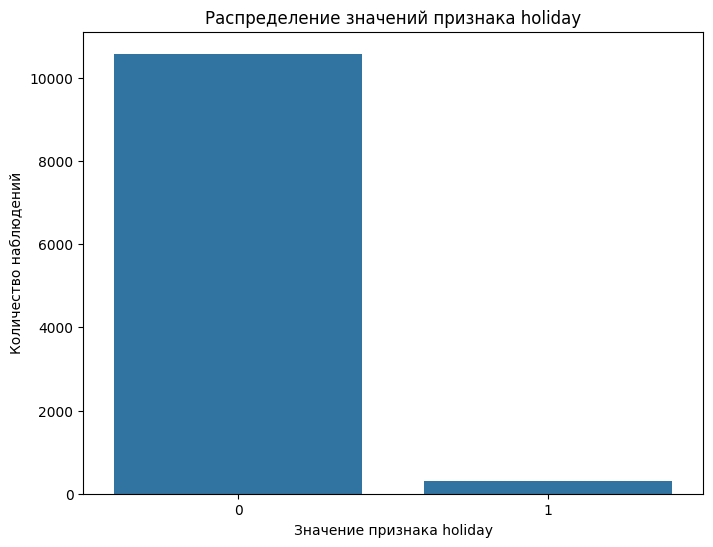

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='holiday', data=df)
plt.title('Распределение значений признака holiday')
plt.xlabel('Значение признака holiday')
plt.ylabel('Количество наблюдений')
plt.savefig('holiday_countplot.png', dpi=100)

## Задание №2

### Работа с набором данных для задачи логистической регрессии (целевая переменная - класс 0 или 1)

* Постройте график распределения данных.
* Постройте ящик с усами для числовых признаков. Зафиксируйте признаки с выбросами.
* Для текстовых признаков постройте диаграммы количественного распределения. Зафиксируйте признаки с существенным дисбалансом значений.
* Для зафиксированных признаков проведите дополнительный анализ данных: постройте графики количества значений.
* Для целевой переменной постройте график количества данных по каждом классу.
* Сохраните каждый график как картинку.
  

##Решение задания №2


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/content/titanic/train.csv')

####График распределения данных

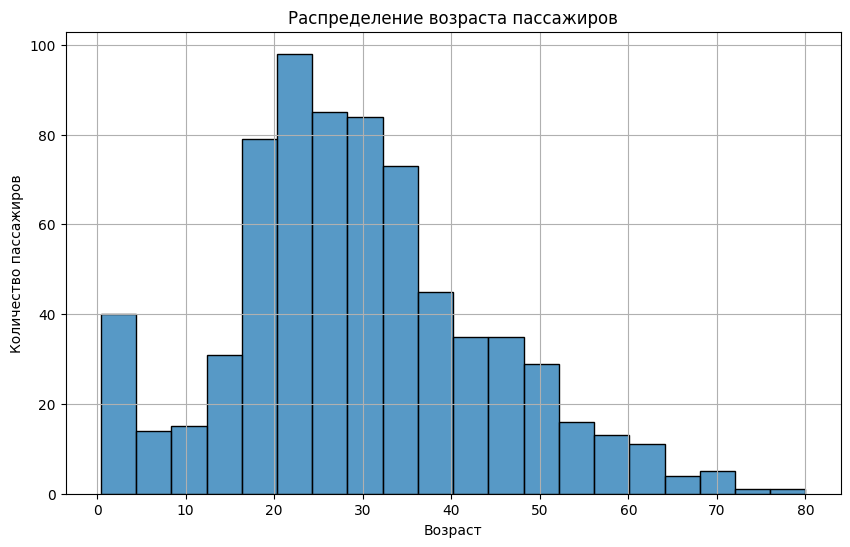

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', stat="count")
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.savefig('age_distribution.png', dpi=300)
plt.show()

####Ящик с усами

Ящики с усами наиболее полезны для анализа признаков, которые имеют большое количество уникальных значений и могут иметь нормальное или близкое к нему распределение. Признаки Pclass, SibSp и Parch лучше анализировать с помощью диаграмм частот.

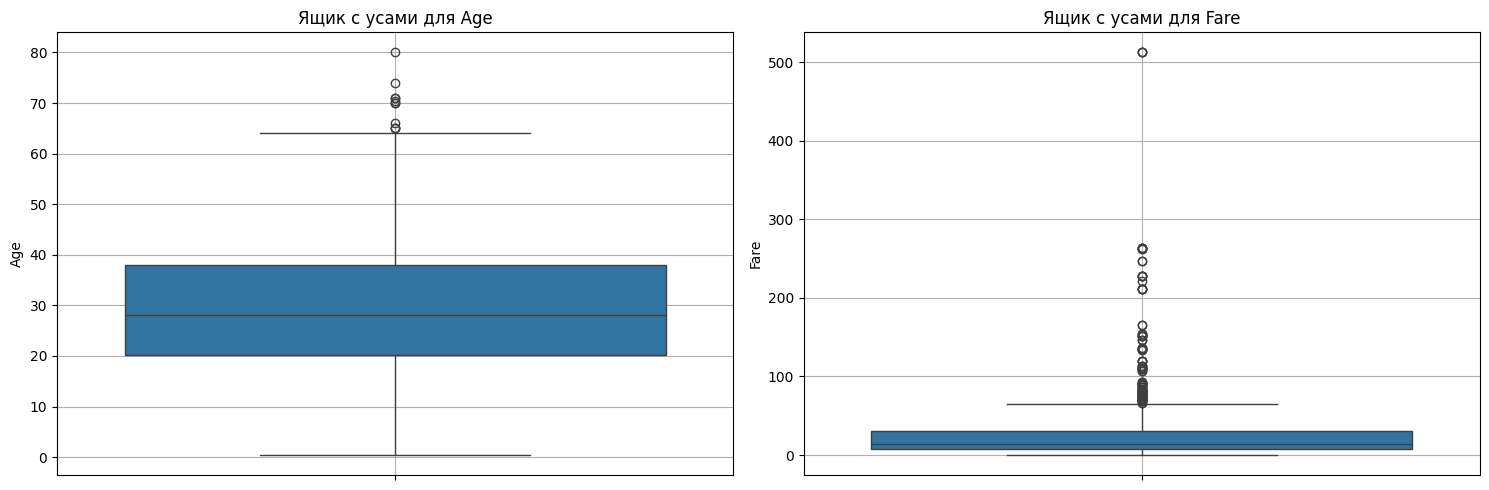

In [32]:
num_features = ['Age', 'Fare']
fig, axes = plt.subplots(nrows=1, ncols=len(num_features), figsize=(15, 5))
for i, feature in enumerate(num_features):
    sns.boxplot(y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Ящик с усами для {feature}')
    axes[i].grid(True)
plt.tight_layout()
plt.savefig('boxplots.png', dpi=300)
plt.show()

#####Анализ выбросов

In [33]:
outliers = {}
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[feature] = {'lower': lower_bound, 'upper': upper_bound}
print(outliers)

{'Age': {'lower': -6.6875, 'upper': 64.8125}, 'Fare': {'lower': -26.724, 'upper': 65.6344}}


###Диаграмма количественного распределения для текстовых признаков:

Признаки Cabin, Ticket и Name не были включены в построение диаграммы количественного распределения, так как они содержат уникальные или почти уникальные значения для большинства записей.

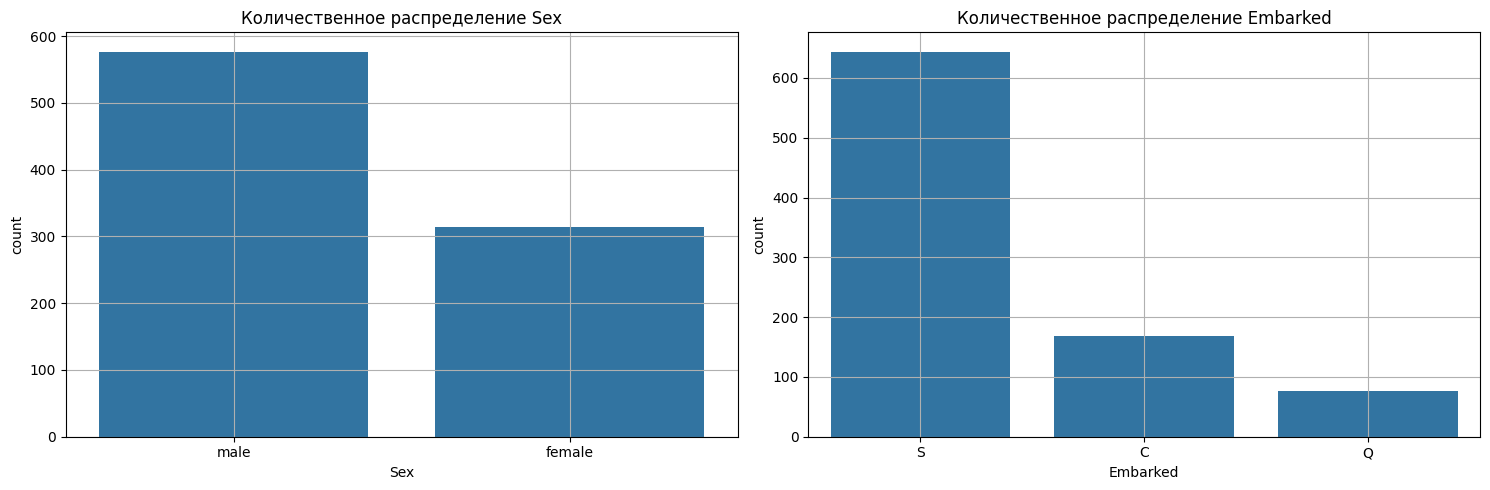

In [34]:
cat_features = ['Sex', 'Embarked']
fig, axes = plt.subplots(nrows=1, ncols=len(cat_features), figsize=(15, 5))
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Количественное распределение {feature}')
    axes[i].grid(True)
plt.tight_layout()
plt.savefig('countplots.png', dpi=300)
plt.show()

###Дополнительный анализ данных для признаков с выбросами

На этих гистограммах дополнительно рисуются линии, соответствующие нижним и верхним границам выбросов.

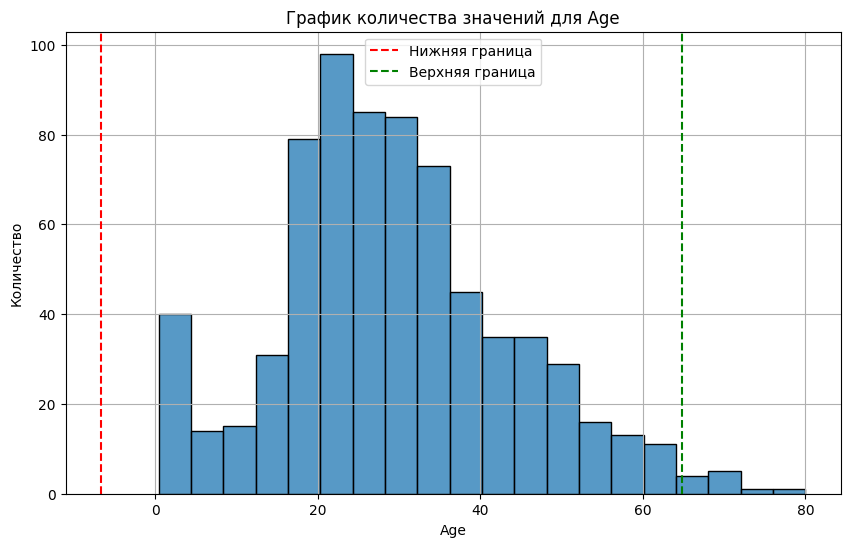

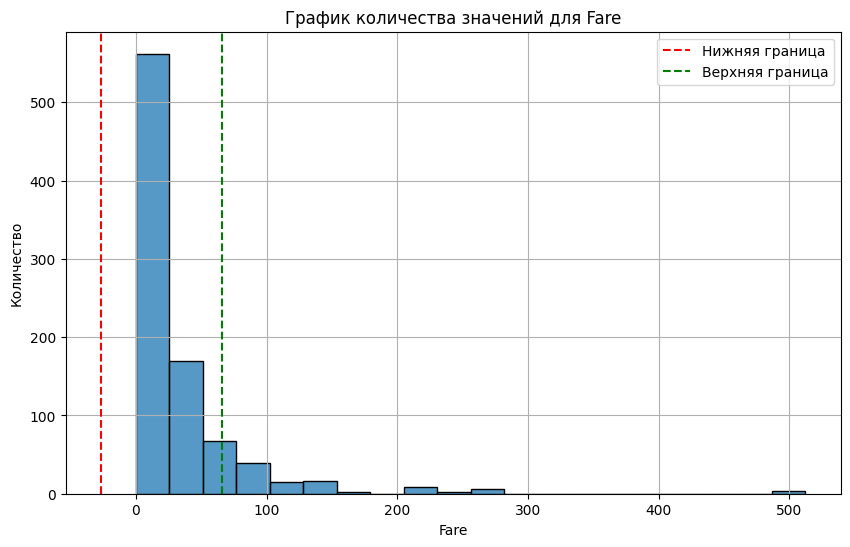

In [37]:
for feature in outliers.keys():
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, bins=20)
    plt.axvline(outliers[feature]['lower'], color='r', linestyle='--', label='Нижняя граница')
    plt.axvline(outliers[feature]['upper'], color='g', linestyle='--', label='Верхняя граница')
    plt.legend()
    plt.title(f'График количества значений для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.grid(True)
    plt.savefig(f'{feature}_histogram.png', dpi=300)
    plt.show()

###График количества данных по каждому классу для целевой переменной

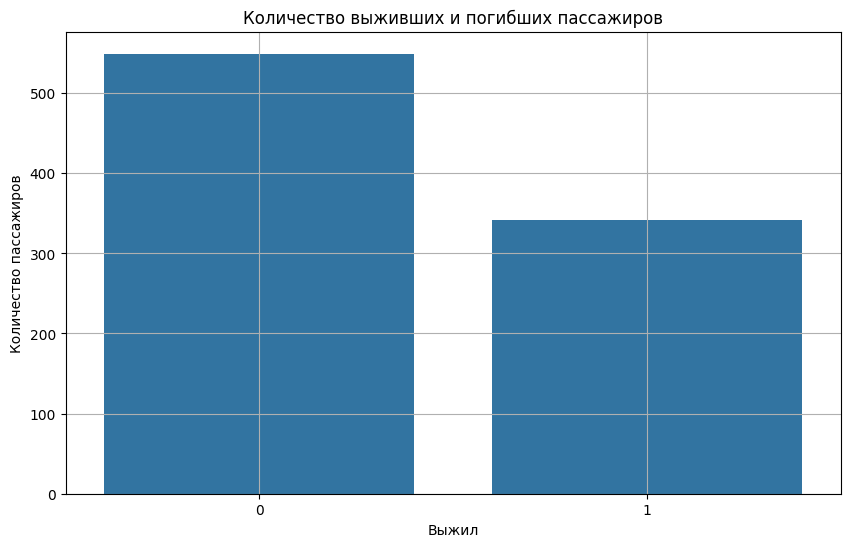

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Количество выживших и погибших пассажиров')
plt.xlabel('Выжил')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.savefig('survival_count.png', dpi=300)
plt.show()